# Análisis Predictivo para una Tienda Minorista

### Objetivo
Desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Tu objetivo es construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Pasos:
**1. Preparación de Datos**
**2. Análisis Exploratorio de Datos (EDA)**
**3. Selección de Modelo**
**4. Entrenamiento y Evaluación del Modelo**
**5. Conclusión**


In [121]:
#Cargar librerias iniciales
import pandas as pd
import matplotlib.pyplot as plt


1.Preparación de datos

In [122]:
ruta=r"C:\Users\CixoY\Downloads\Ventas (1).csv"
df=pd.read_csv(ruta)
df

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484
...,...,...,...,...,...
360,2022-12-27,2,1,0,2189
361,2022-12-28,3,0,0,2548
362,2022-12-29,4,0,0,3018
363,2022-12-30,5,0,0,3591


In [123]:
df.tail(20)

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
345,2022-12-12,1,0,0,1553
346,2022-12-13,2,1,0,2174
347,2022-12-14,3,0,0,2515
348,2022-12-15,4,0,0,2876
349,2022-12-16,5,0,0,3670
350,2022-12-17,6,0,0,3997
351,2022-12-18,7,0,1,4341
352,2022-12-19,1,0,0,1519
353,2022-12-20,2,1,0,2298
354,2022-12-21,3,0,0,2586


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [125]:
df.describe()

,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365.000000,365.000000,365.000000,365.000000
mean,4.005479,0.200000,0.142466,2997.219178
std,2.002738,0.400549,0.350007,942.096284
min,1.000000,0.000000,0.000000,1305.000000
25%,2.000000,0.000000,0.000000,2195.000000
50%,4.000000,0.000000,0.000000,3074.000000
75%,6.000000,0.000000,0.000000,3979.000000
max,7.000000,1.000000,1.000000,4404.000000


In [126]:
df.isnull()
df.isnull().sum()

Fecha            0
DíaDeLaSemana    0
Promociones      0
Festivo          0
Ventas           0
dtype: int64

2.Análisis exploratorio (EDA)

Text(0.5, 1.0, 'Ventas segun dias de la semana durante el año')

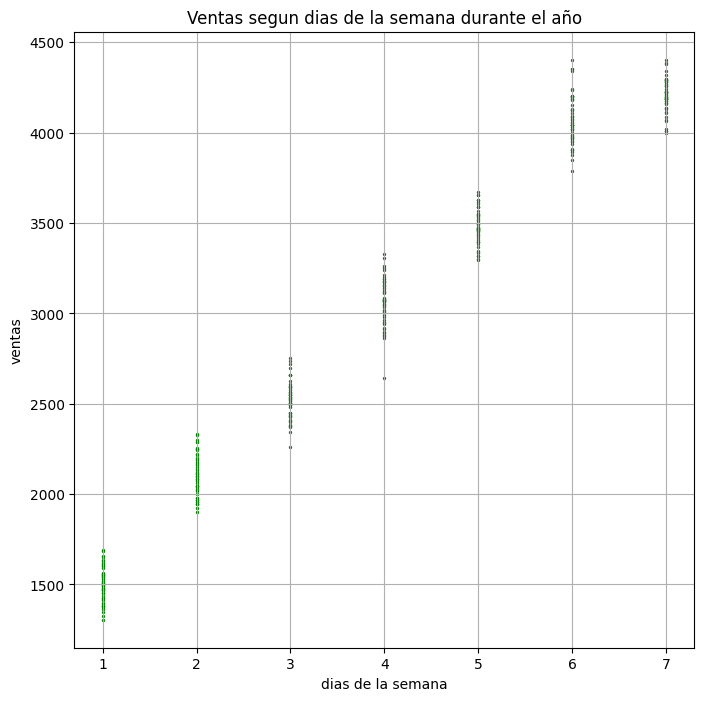

In [127]:
plt.figure(figsize=(8,8))
plt.scatter(df['DíaDeLaSemana'],df['Ventas'],s=2,color='green');
plt.xlabel('dias de la semana')
plt.ylabel('ventas')
plt.grid()
plt.title('Ventas segun dias de la semana durante el año')

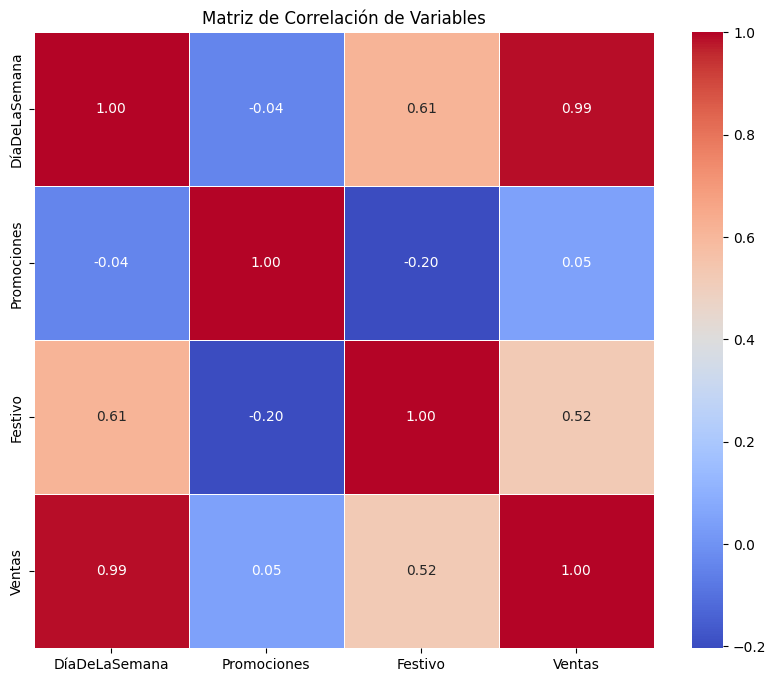

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Calcular la correlación (usando la matriz calculada anteriormente)
matriz_correlacion = df.drop('Fecha',axis=1).corr()

# 2. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8)) 

# 3. Crear el mapa de calor
sns.heatmap(
    matriz_correlacion,
    annot=True,     # Muestra los valores numéricos de correlación en las celdas
    cmap='coolwarm',# Define el esquema de color (coolwarm es ideal para correlaciones: azul/rojo)
    fmt=".2f",      # Formato para mostrar los números (dos decimales)
    linewidths=.5,  # Líneas para separar las celdas
    cbar=True       # Muestra la barra de color
)

plt.title('Matriz de Correlación de Variables')
plt.show()

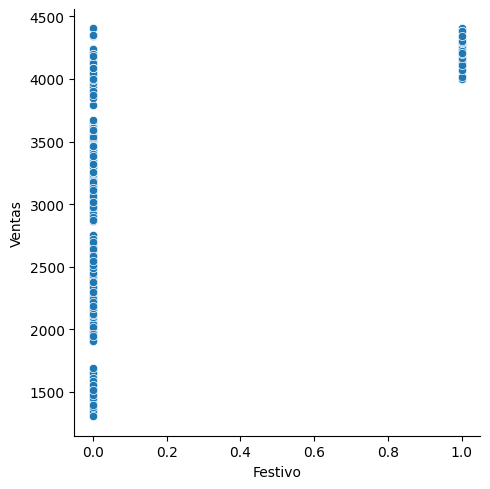

In [129]:
sns.relplot(data=df,x='Festivo',y='Ventas',kind='scatter');


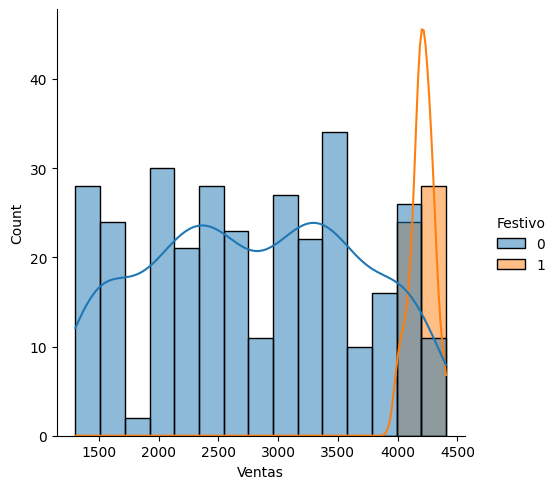

In [130]:
sns.displot(data=df,x='Ventas',bins=15,kde=True,hue='Festivo')


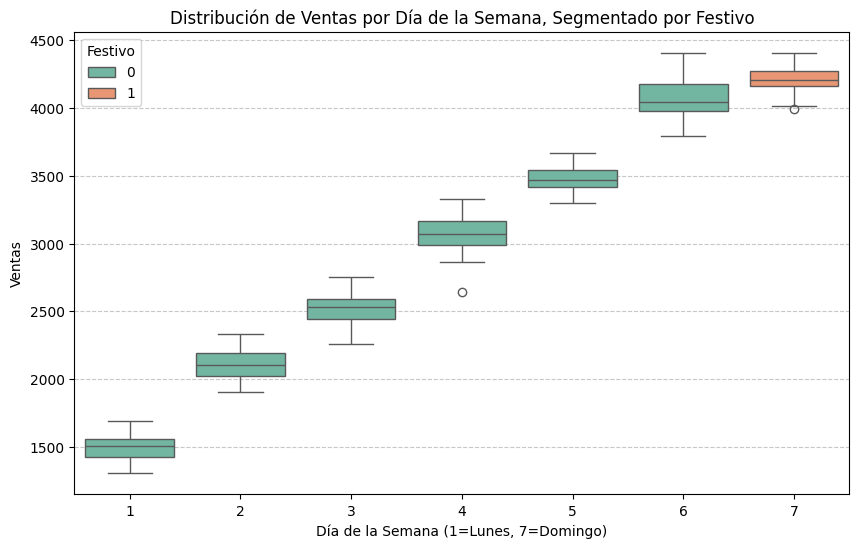

In [131]:

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='DíaDeLaSemana',
    y='Ventas',
    hue='Festivo', # <-- Segmenta por si es Festivo (0) o No Festivo (1)
    palette='Set2' 
)

plt.title('Distribución de Ventas por Día de la Semana, Segmentado por Festivo')
plt.xlabel('Día de la Semana (1=Lunes, 7=Domingo)')
plt.ylabel('Ventas')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

3.Seleccion modelo

In [132]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
escala=MinMaxScaler(feature_range=(0,1))
normado=escala.fit_transform(df.drop('Fecha',axis=1))
df_nuevo=pd.DataFrame(data=normado,columns=df.drop('Fecha',axis=1).columns)
df_nuevo

,DíaDeLaSemana,Promociones,Festivo,Ventas
0,0.833333,0.0,0.0,0.880284
1,1.000000,0.0,1.0,0.873508
2,0.000000,0.0,0.0,0.097773
3,0.166667,1.0,0.0,0.239109
4,0.333333,0.0,0.0,0.380445
...,...,...,...,...
360,0.166667,1.0,0.0,0.285253
361,0.333333,0.0,0.0,0.401097
362,0.500000,0.0,0.0,0.552759
363,0.666667,0.0,0.0,0.737657


In [133]:
columnas_a_eliminar = ['Promociones', 'Ventas'] 

X = df_nuevo.drop(columnas_a_eliminar, axis=1)
y = df_nuevo['Ventas']

4.Entrenamiento y evaluación

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [135]:
modelo=RandomForestRegressor()
modelo.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [136]:
precision=modelo.score(X_train,y_train)
print(f'la precision del modelo es de {precision}')
from sklearn.metrics import r2_score

# 1. Hacer predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test)

# 2. Calcular el R2 en el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)

print(f"R2 (Precisión) en el conjunto de PRUEBA: {r2_test:.4f}")
from sklearn.metrics import mean_squared_error
import numpy as np

# y_pred_test ya está calculado
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE real en el conjunto de PRUEBA: {rmse_test:.2f}")

la precision del modelo es de 0.9847814239328169
R2 (Precisión) en el conjunto de PRUEBA: 0.9902
RMSE real en el conjunto de PRUEBA: 0.03


Text(0, 0.5, 'Ventas predichas')

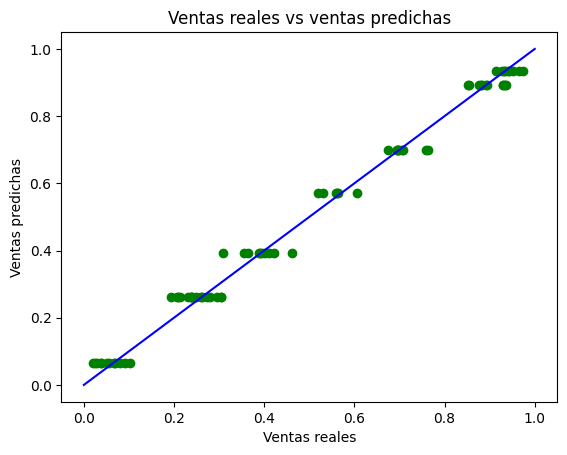

In [137]:
plt.scatter(y_test,y_pred_test,color='green')
plt.plot([y.min(),y.max()],[y.min(),y.max()],color='blue')
plt.title('Ventas reales vs ventas predichas')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')

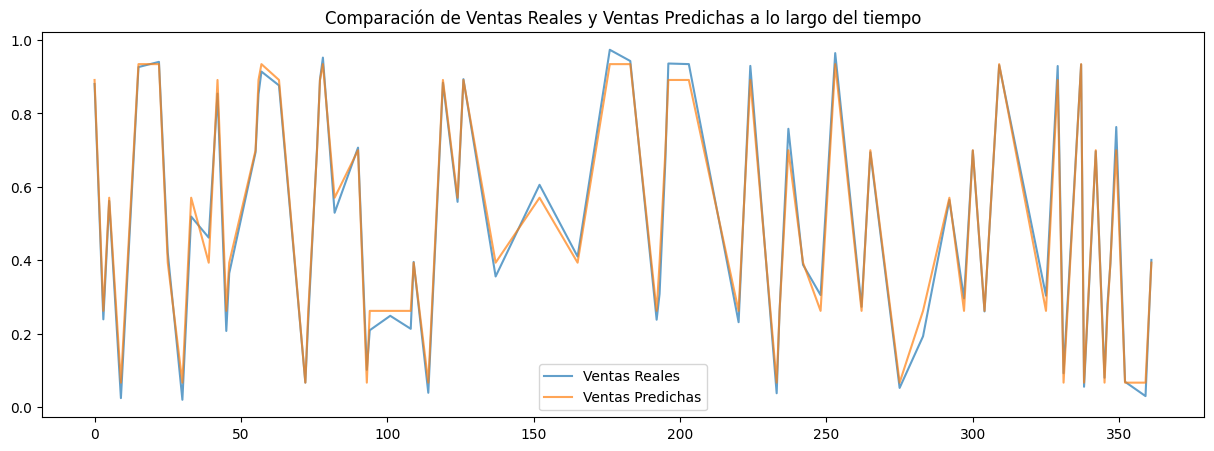

In [138]:
df_test = pd.DataFrame({
    'Ventas Reales': y_test,
    'Ventas Predichas': y_pred_test
})
df_test=df_test.sort_index()
plt.figure(figsize=(15, 5))
plt.plot(df_test['Ventas Reales'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Ventas Predichas'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');

# 5.Conclusiones 
El modelo predictivo de ventas desarrollado (Random Forest Regressor) ha demostrado ser excepcionalmente preciso y fiable para pronosticar las ventas diarias, logrando una comprensión clara de los factores que impulsan la demanda.
1. Rendimiento del Modelo (Precisión y Fiabilidad):
El modelo exhibió un rendimiento casi perfecto en el conjunto de prueba, resolviendo el problema de la fuga de datos inicial y ofreciendo resultados sólidos:Precisión ($R^2$): $0.9902$. El modelo explica el 99% de la variabilidad en las ventas diarias, lo que indica que la demanda en el negocio es altamente predecible basándose en el calendario.Representación Visual: El gráfico de Ventas Reales vs. Predichas  muestra que los puntos se agrupan perfectamente alrededor de la línea diagonal. Esto valida la precisión de forma visual, confirmando la alta fiabilidad del modelo.
2. Factores Clave de la Demanda (Importancia de Características):
El análisis exploratorio y la mecánica interna del modelo coinciden en señalar que el factor dominante de la demanda es la estructura temporal del calendario, desglosada de la siguiente manera:
Motor Principal: Día de la Semana ($\approx 82\%$ de Importancia): El gráfico de Distribución de Ventas por Día de la Semana  demuestra que las ventas siguen un patrón estrictamente lineal y ascendente de Lunes (1) a Domingo (7). Esta variable es el predictor fundamental.Factor Modulador: Festivo ($\approx 18\%$ de Importancia): La condición de día Festivo impulsa las ventas de manera significativa, llevándolas consistentemente a los rangos más altos (picos de densidad en la distribución).
Factor Irrelevante: Promociones: El impacto de las Promociones es insignificante en el volumen total de ventas (Importancia $\approx 0.1\%$).
3. Conclusión de Negocio y Recomendaciones:
El modelo de Random Forest ha capturado la naturaleza subyacente de la demanda: las ventas se mueven en saltos discretos (o escalones) basados en categorías de días, no en una curva suave o continua.
Recomendaciones Accionables:Optimización Operativa: Utilizar las predicciones para optimizar la dotación de personal, la logística y la planificación de inventario. La mayor parte de la asignación de recursos debe escalarse directamente con el Día de la Semana.
Reevaluación de la Estrategia de Promociones: Dado el peso insignificante de la variable Promociones, se recomienda investigar si estas están siendo costosas o inefectivas y evaluar si los recursos invertidos en ellas podrían redirigirse a estrategias basadas en días de alta demanda (fines de semana y festivos).
Implementación del Pronóstico: El modelo está listo para generar pronósticos futuros de ventas con alta confianza, permitiendo una planificación financiera y operativa proactiva y basada en datos.